<a href="https://colab.research.google.com/github/Shreya549/Stonks/blob/main/Stock_Market_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import plotly.graph_objects as go

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Shreya549/Stonks/main/NIFTY50_all.csv')

In [4]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619.0,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278.0,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678.0,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913.0,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123.0,0.2741


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Prev Close,230104.0,1.223351e+03,2.486955e+03,0.000000e+00,2.721000e+02,5.534000e+02,1.212400e+03,3.286195e+04
Open,230104.0,1.224781e+03,2.490538e+03,8.500000e+00,2.726500e+02,5.543000e+02,1.212525e+03,3.339995e+04
High,230104.0,1.243074e+03,2.523631e+03,9.750000e+00,2.773500e+02,5.640000e+02,1.234000e+03,3.348000e+04
Low,230104.0,1.205075e+03,2.453191e+03,8.500000e+00,2.675000e+02,5.440500e+02,1.191312e+03,3.246810e+04
Last,230104.0,1.223449e+03,2.486689e+03,9.100000e+00,2.721500e+02,5.535250e+02,1.212062e+03,3.284900e+04
Close,230104.0,1.223601e+03,2.487373e+03,9.150000e+00,2.722000e+02,5.534500e+02,1.212550e+03,3.286195e+04
VWAP,230104.0,1.224165e+03,2.487933e+03,9.210000e+00,2.724300e+02,5.540050e+02,1.213472e+03,3.297524e+04
Volume,230104.0,2.745270e+06,6.318414e+06,3.000000e+00,2.091048e+05,9.737570e+05,2.836929e+06,4.810589e+08
Turnover,230104.0,1.432868e+14,2.873267e+14,1.047000e+07,1.516068e+13,6.401709e+13,1.711896e+14,3.564334e+16
Trades,115256.0,5.742162e+04,6.223416e+04,1.100000e+01,2.077000e+04,4.169500e+04,7.397825e+04,1.643015e+06


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230104 entries, 0 to 230103
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Date                230104 non-null  object 
 1   Symbol              230104 non-null  object 
 2   Series              230104 non-null  object 
 3   Prev Close          230104 non-null  float64
 4   Open                230104 non-null  float64
 5   High                230104 non-null  float64
 6   Low                 230104 non-null  float64
 7   Last                230104 non-null  float64
 8   Close               230104 non-null  float64
 9   VWAP                230104 non-null  float64
 10  Volume              230104 non-null  int64  
 11  Turnover            230104 non-null  float64
 12  Trades              115256 non-null  float64
 13  Deliverable Volume  214027 non-null  float64
 14  %Deliverble         214027 non-null  float64
dtypes: float64(11), int64(1), object(3

In [7]:
df.isna().sum()

Date                       0
Symbol                     0
Series                     0
Prev Close                 0
Open                       0
High                       0
Low                        0
Last                       0
Close                      0
VWAP                       0
Volume                     0
Turnover                   0
Trades                114848
Deliverable Volume     16077
%Deliverble            16077
dtype: int64

**Since Trades column has a huge number of null values, we will be dropping it**

In [9]:
len(df['Symbol'].unique())

66

In [10]:
df['Symbol'].unique()

array(['MUNDRAPORT', 'ADANIPORTS', 'ASIANPAINT', 'UTIBANK', 'AXISBANK',
       'BAJAJ-AUTO', 'BAJAJFINSV', 'BAJAUTOFIN', 'BAJFINANCE', 'BHARTI',
       'BHARTIARTL', 'BPCL', 'BRITANNIA', 'CIPLA', 'COALINDIA', 'DRREDDY',
       'EICHERMOT', 'GAIL', 'GRASIM', 'HCLTECH', 'HDFC', 'HDFCBANK',
       'HEROHONDA', 'HEROMOTOCO', 'HINDALC0', 'HINDALCO', 'HINDLEVER',
       'HINDUNILVR', 'ICICIBANK', 'INDUSINDBK', 'INFRATEL', 'INFOSYSTCH',
       'INFY', 'IOC', 'ITC', 'JSWSTL', 'JSWSTEEL', 'KOTAKMAH',
       'KOTAKBANK', 'LT', 'M&M', 'MARUTI', 'NESTLEIND', 'NTPC', 'ONGC',
       'POWERGRID', 'RELIANCE', 'SBIN', 'SHREECEM', 'SUNPHARMA', 'TELCO',
       'TATAMOTORS', 'TISCO', 'TATASTEEL', 'TCS', 'TECHM', 'TITAN',
       'ULTRACEMCO', 'UNIPHOS', 'UPL', 'SESAGOA', 'SSLT', 'VEDL', 'WIPRO',
       'ZEETELE', 'ZEEL'], dtype=object)

[Text(0, 0, 'MUNDRAPORT'),
 Text(0, 0, 'ADANIPORTS'),
 Text(0, 0, 'ASIANPAINT'),
 Text(0, 0, 'UTIBANK'),
 Text(0, 0, 'AXISBANK'),
 Text(0, 0, 'BAJAJ-AUTO'),
 Text(0, 0, 'BAJAJFINSV'),
 Text(0, 0, 'BAJAUTOFIN'),
 Text(0, 0, 'BAJFINANCE'),
 Text(0, 0, 'BHARTI'),
 Text(0, 0, 'BHARTIARTL'),
 Text(0, 0, 'BPCL'),
 Text(0, 0, 'BRITANNIA'),
 Text(0, 0, 'CIPLA'),
 Text(0, 0, 'COALINDIA'),
 Text(0, 0, 'DRREDDY'),
 Text(0, 0, 'EICHERMOT'),
 Text(0, 0, 'GAIL'),
 Text(0, 0, 'GRASIM'),
 Text(0, 0, 'HCLTECH'),
 Text(0, 0, 'HDFC'),
 Text(0, 0, 'HDFCBANK'),
 Text(0, 0, 'HEROHONDA'),
 Text(0, 0, 'HEROMOTOCO'),
 Text(0, 0, 'HINDALC0'),
 Text(0, 0, 'HINDALCO'),
 Text(0, 0, 'HINDLEVER'),
 Text(0, 0, 'HINDUNILVR'),
 Text(0, 0, 'ICICIBANK'),
 Text(0, 0, 'INDUSINDBK'),
 Text(0, 0, 'INFRATEL'),
 Text(0, 0, 'INFOSYSTCH'),
 Text(0, 0, 'INFY'),
 Text(0, 0, 'IOC'),
 Text(0, 0, 'ITC'),
 Text(0, 0, 'JSWSTL'),
 Text(0, 0, 'JSWSTEEL'),
 Text(0, 0, 'KOTAKMAH'),
 Text(0, 0, 'KOTAKBANK'),
 Text(0, 0, 'LT'),
 Text(0, 0, '

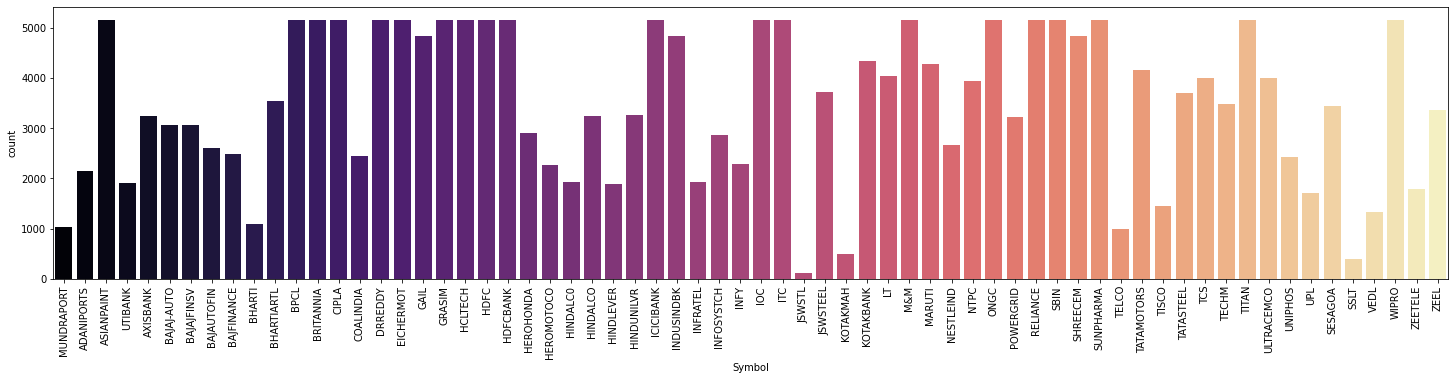

In [11]:
plt.figure(figsize=(25,5))
chart = sns.countplot(x='Symbol', data=df, palette = 'magma')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

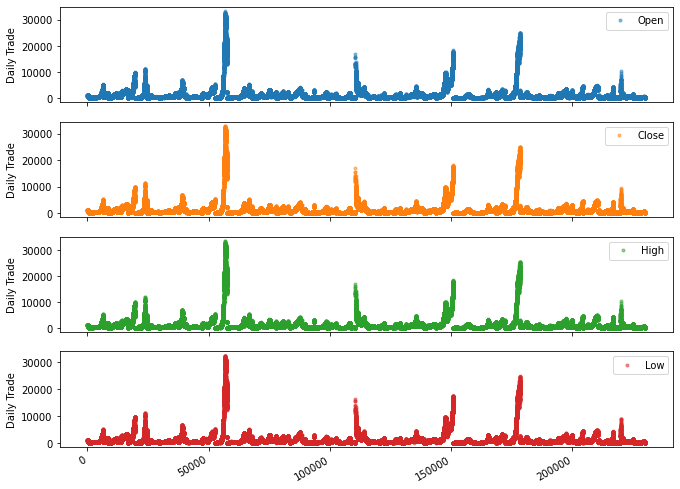

In [12]:
cols_plot = ['Open', 'Close', 'High','Low']
axes = df[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Trade')

In [16]:
df['Date']=pd.to_datetime(df['Date'])
df.set_index(['Date'], drop = False, inplace=True)
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,,
2007-11-27,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619.0,0.3612
2007-11-28,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278.0,0.3172
2007-11-29,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678.0,0.2088
2007-11-30,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913.0,0.2735
2007-12-03,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123.0,0.2741


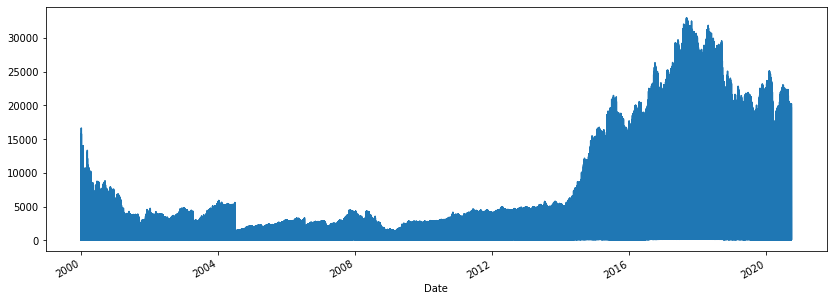

In [17]:
df.VWAP.plot(figsize=(14, 5))

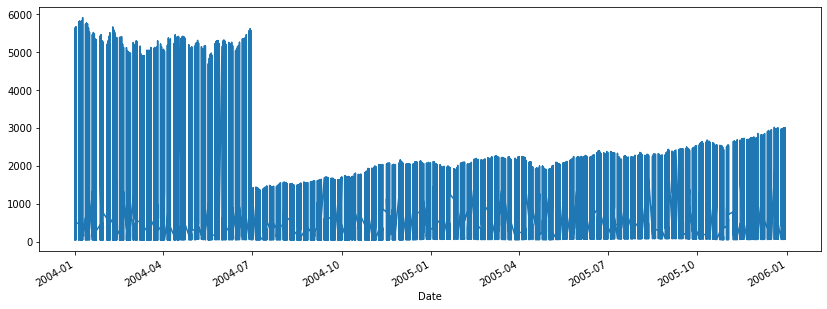

In [18]:
df.loc['2004-01-01':'2005-12-31'].VWAP.plot(figsize=(14, 5))

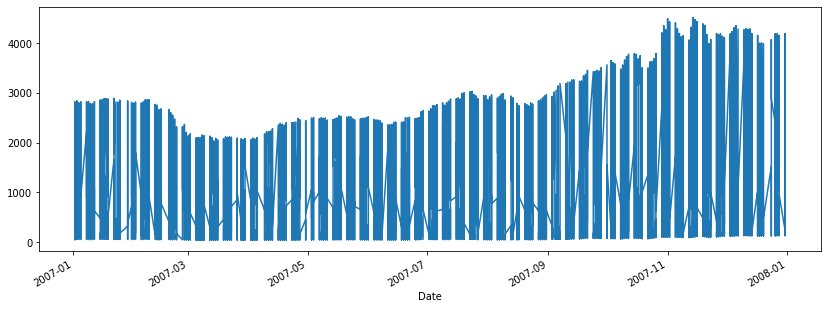

In [19]:
df.loc['2007-01-01':'2007-12-31'].VWAP.plot(figsize=(14, 5))

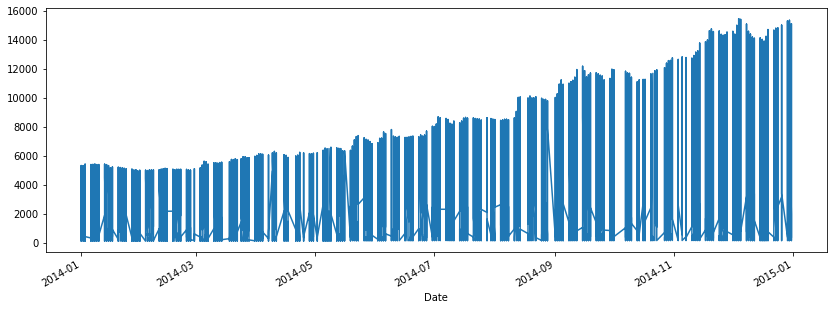

In [20]:
df.loc['2014-01-01':'2014-12-31'].VWAP.plot(figsize=(14, 5))

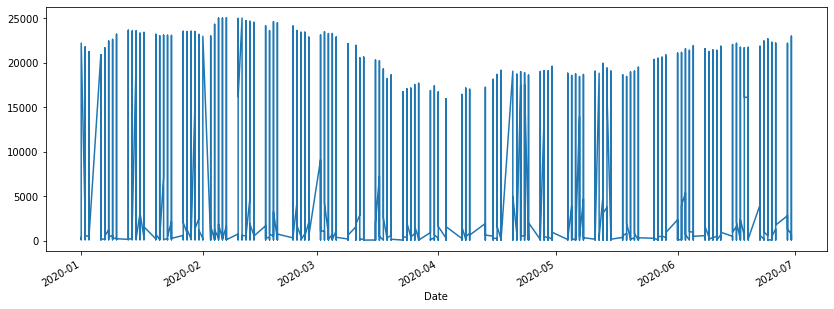

In [21]:
df.loc['2020-01-01':'2020-06-30'].VWAP.plot(figsize=(14, 5))

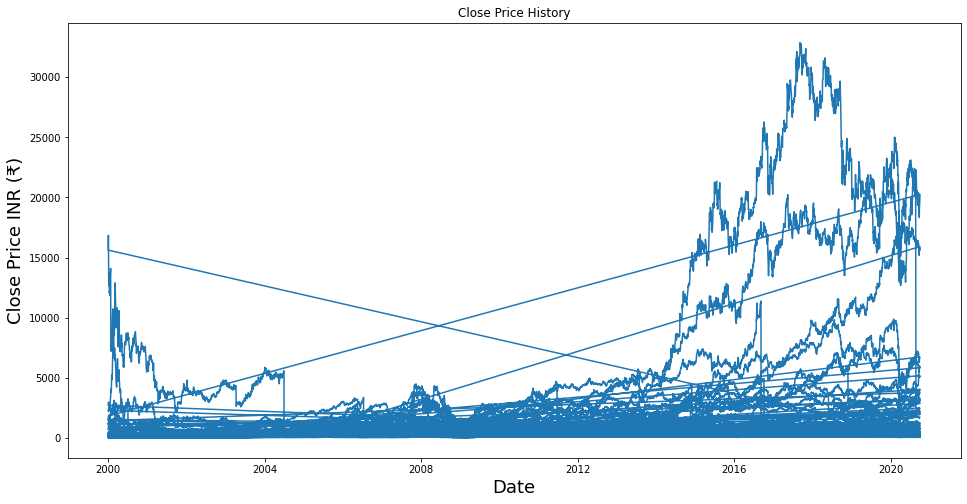

In [22]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price INR (₹)',fontsize=18)
plt.show()

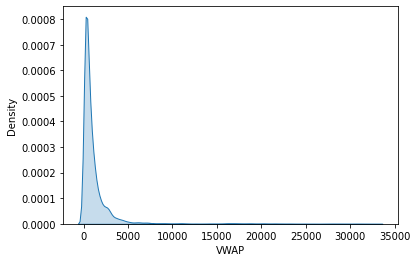

In [23]:
sns.kdeplot(df['VWAP'],shade=True)

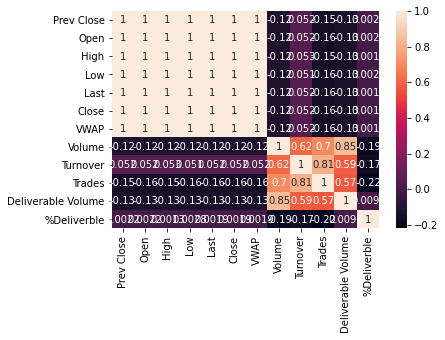

In [25]:
corr = df.corr()
sns.heatmap(corr, annot = True)